In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
# Define which policy database to use
dbs = [
    '',
    '_cclw',
    '_nci',
]
dbpath = dbs[0]

In [3]:
#emissions = pd.read_excel("data/essd_ghg_data_gwp100 (1).xlsx", sheet_name="data")
emissions = pd.read_excel("../data/edgar_v7_ghg_data_gwp100.xlsx", sheet_name="data")
emissions.loc[emissions["subsector_title"]=="Waste","sector_title"] = "Waste"
emissions.loc[emissions["sector_title"]=="Energy systems","sector_title"] = "Energy"
emissions.head()

,iso,country,region_ar6_6,region_ar6_6_short,region_ar6_10,region_ar6_10_short,year,sector_title,subsector_title,CO2,CH4,N2O,Fgas,GHG
0,ABW,Aruba,Latin America and Caribbean,LAM,Latin America and Caribbean,Latin Am.,1990,Buildings,Residential,26335.849995,366.820206,79.346807,0.0,26782.017008
1,ABW,Aruba,Latin America and Caribbean,LAM,Latin America and Caribbean,Latin Am.,1990,Energy,Electricity & heat,212235.419054,77.843285,267.675851,0.0,212580.938190
2,ABW,Aruba,Latin America and Caribbean,LAM,Latin America and Caribbean,Latin Am.,1990,Energy,Oil and gas fugitive emissions,0.024653,11.019916,0.000000,0.0,11.044569
3,ABW,Aruba,Latin America and Caribbean,LAM,Latin America and Caribbean,Latin Am.,1990,Energy,Other (energy systems),176504.185100,806.262005,2793.849381,0.0,180104.296486
4,ABW,Aruba,Latin America and Caribbean,LAM,Latin America and Caribbean,Latin Am.,1990,Industry,Chemicals,1706.210733,0.000000,0.186633,0.0,1706.397367


In [4]:
total_emissions = (emissions
                   .query('year==2020')
                   .groupby(["iso","region_ar6_6","region_ar6_10"])["GHG"]
                   .sum()
                   .reset_index()
                   .rename(columns={"iso":"country_code3"})
                  )
total_emissions

,country_code3,region_ar6_6,region_ar6_10,GHG
0,ABW,Latin America and Caribbean,Latin America and Caribbean,1.196888e+06
1,AFG,Asia and developing Pacific,Southern Asia,3.148178e+07
2,AGO,Africa,Africa,6.855701e+07
3,AIA,Latin America and Caribbean,Latin America and Caribbean,2.749062e+04
4,AIR,Intl. Aviation,Intl. Aviation,3.427769e+08
...,...,...,...,...
205,WSM,Asia and developing Pacific,South-East Asia and Pacific,6.050514e+05
206,YEM,Middle East,Middle East,3.455609e+07
207,ZAF,Africa,Africa,5.386918e+08
208,ZMB,Africa,Africa,2.589686e+07


In [5]:
cdf = pd.read_csv('../data/country_studies.csv')
print(cdf.shape)
cdf.head()

(218, 15)


,country_code3,INCLUDE,4 - 1. Economic instruments,4 - 2. Regulatory Instruments,"4 - 3. Information, education and training","4 - 4. Governance, strategies and targets",4 - 5. Agreements,8 - 01. AFOLU,8 - 02. Buildings,8 - 03. Industry,8 - 04. Energy,8 - 05. Transport,8 - 06. Waste,8 - 15. Cross-sectoral,continent
0,AFG,13,4,0,0,6,3,2,0,0,7,1,0,3,Asia
1,AGO,2,1,0,0,1,0,1,0,0,1,0,0,0,Africa
2,ALA,2,0,0,0,2,0,0,0,0,1,0,0,1,Europe
3,ALB,3,0,1,0,2,0,1,0,0,2,0,0,0,Europe
4,ARE,0,0,0,0,0,0,0,0,0,0,0,0,0,Asia


In [6]:
places = pd.read_feather('../data/processed_places.feather')
chn_usa = places.loc[places["country_code3"].isin(["CHN","USA"])].doc_id.unique().shape[0]
country_specific = places.loc[pd.notna(places["country_code3"])].doc_id.unique().shape[0]
chn_usa/country_specific

0.3437322140011383

In [7]:
cdf_pol = pd.read_csv(f'../data/pdb_countries{dbpath}.csv')
print(cdf_pol.shape)
cdf_pol.head()

(202, 14)


,country_code3,n_policies,Economic instruments,Regulatory Instruments,"Information, education and training","Governance, strategies and targets",Agreements,AFOLU,Buildings,Energy,Industry,Transport,Waste,Cross-sectoral
0,AFG,9,2,0,2,7,1,2,0,6,0,1,1,3
1,AGO,22,1,2,3,22,2,4,3,9,4,3,1,10
2,ALB,9,0,1,0,9,2,1,1,7,4,1,0,4
3,AND,25,7,11,4,10,0,0,10,20,1,5,1,4
4,ARE,39,14,9,3,20,0,1,8,16,6,8,1,9


In [8]:
trends = pd.read_csv('../data/emissions_trends.csv')

trends

,country_code3,GHG_trend,intensity_trend,start_year
0,ABW,0.041898,-0.048803,1990
1,ABW,0.040413,-0.043216,1991
2,ABW,0.043040,-0.032086,1992
3,ABW,0.050198,-0.015168,1993
4,ABW,0.063670,0.006365,1994
...,...,...,...,...
4009,ZWE,0.023339,-0.145477,2007
4010,ZWE,0.018769,-0.110472,2008
4011,ZWE,0.011020,-0.053643,2009
4012,ZWE,0.002145,-0.036469,2010


In [9]:
trends = pd.read_csv('../data/emissions_trends.csv')
trends = trends[trends["start_year"]==2011]
trends = trends.groupby('country_code3')['GHG_trend'].agg(['max','min']).reset_index()
trends["spread"] = trends['max'] - trends['min']
trends

,country_code3,max,min,spread
0,AGO,-0.008723,-0.008723,0.0
1,ALB,0.001997,0.001997,0.0
2,ARG,0.004126,0.004126,0.0
3,ARM,0.012186,0.012186,0.0
4,ATG,-0.037665,-0.037665,0.0
...,...,...,...,...
166,WSM,0.025555,0.025555,0.0
167,YEM,-0.067676,-0.067676,0.0
168,ZAF,-0.001585,-0.001585,0.0
169,ZMB,0.031073,0.031073,0.0


In [10]:
trends_5 = pd.read_csv('../data/emissions_trends_5.csv')
trends_5 = trends_5[trends_5["start_year"]==2016]
trends_5 = trends_5.groupby('country_code3')['GHG_trend'].agg(['max','min']).reset_index().rename(columns={
    'max':'max_5',
    'min': 'min_5'
})
#trends["spread"] = trends['max'] - trends['min']
trends_5

,country_code3,max_5,min_5
0,AGO,-0.049890,-0.049890
1,ALB,-0.014822,-0.014822
2,ARG,-0.009990,-0.009990
3,ARM,0.027114,0.027114
4,ATG,-0.076096,-0.076096
...,...,...,...
167,WSM,0.017521,0.017521
168,YEM,0.034109,0.034109
169,ZAF,-0.014079,-0.014079
170,ZMB,0.011031,0.011031


In [11]:
df = total_emissions.merge(trends).merge(trends_5).merge(cdf, how="outer").merge(cdf_pol, how="outer")
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import cartopy.feature as feature

shpfilename = shpreader.natural_earth(
    resolution='50m',
    category='cultural',
    name='admin_0_countries'
)
adm0shps = geopandas.read_file(shpfilename,encoding='utf-8')
#adm0shps = adm0shps.set_crs("EPSG:8857")
adm0shps = adm0shps.set_crs("EPSG:32662")
print(adm0shps.shape)
adm0shps = adm0shps[adm0shps["TYPE"].str.lower().str.contains("country")]
p = ccrs.EqualEarth()
adm0shps["ee_geo"] = [p.project_geometry(x, src_crs=ccrs.PlateCarree()) for x in adm0shps.geometry]

df = adm0shps.merge(df, left_on="ADM0_A3", right_on="country_code3")#.sample(50)

#df["ee_geo"] = [p.project_geometry(x, src_crs=ccrs.PlateCarree()) for x in df.geometry]
print(df.shape)
df.head()

(241, 95)
(198, 132)


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,"Information, education and training","Governance, strategies and targets",Agreements,AFOLU,Buildings,Energy,Industry,Transport,Waste,Cross-sectoral
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,Zimbabwe,ZWE,...,1.0,12.0,0.0,2.0,1.0,5.0,2.0,6.0,2.0,6.0
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,ZMB,...,1.0,17.0,0.0,8.0,0.0,9.0,2.0,3.0,0.0,6.0
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,YEM,...,0.0,7.0,0.0,2.0,2.0,3.0,1.0,0.0,1.0,1.0
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,Vietnam,VNM,...,9.0,56.0,4.0,17.0,5.0,26.0,10.0,8.0,1.0,25.0
4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,Venezuela,VEN,...,2.0,8.0,0.0,0.0,1.0,5.0,2.0,2.0,0.0,2.0


In [12]:
df["studies_GHG"] = df["INCLUDE"] / (df["GHG"]/1e9) 
df["policies_GHG"] = df["n_policies"] / (df["GHG"]/1e9) 
df["studies_policy"] = df["INCLUDE"] / (df["n_policies"]) 
df["studies_reduction"] = df["INCLUDE"] / df["min"]*-1
df["studies_reduction_5"] = df["INCLUDE"] / df["min_5"]*-1
df["studies_increase"] = df["INCLUDE"] / df["max"]
df["studies_spread"] = df["INCLUDE"] / df["spread"]

In [13]:
df[df['country_code3']=='USA']['n_policies']

10    474.0
Name: n_policies, dtype: float64

In [14]:
df.sort_values('studies_GHG',ascending=False)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,Transport,Waste,Cross-sectoral,studies_GHG,policies_GHG,studies_policy,studies_reduction,studies_reduction_5,studies_increase,studies_spread
13,Admin-0 country,1,2,United Kingdom,GB1,1,2,Country,United Kingdom,GBR,...,72.0,5.0,42.0,11715.665899,543.142891,21.570136,1.371329e+05,114162.479724,-1.371329e+05,inf
30,Admin-0 country,3,3,Sweden,SWE,0,2,Sovereign country,Sweden,SWE,...,30.0,3.0,15.0,11035.999595,1387.662671,7.952941,3.733451e+04,25527.654890,-3.733451e+04,inf
73,Admin-0 country,1,2,New Zealand,NZ1,1,2,Country,New Zealand,NZL,...,14.0,1.0,15.0,8243.914941,530.310318,15.545455,7.165705e+06,101407.785556,-7.165705e+06,inf
39,Admin-0 country,4,3,Solomon Islands,SLB,0,2,Sovereign country,Solomon Islands,SLB,...,1.0,0.0,4.0,7095.057171,14190.114342,0.500000,4.327514e+02,-219.831489,-4.327514e+02,inf
95,Admin-0 country,1,6,Luxembourg,LUX,0,2,Sovereign country,Luxembourg,LUX,...,12.0,1.0,8.0,6949.723326,2316.574442,3.000000,2.616752e+03,3893.213506,-2.616752e+03,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Admin-0 country,1,3,Denmark,DN1,1,2,Country,Greenland,GRL,...,0.0,0.0,1.0,NaN,NaN,29.000000,NaN,NaN,NaN,NaN
151,Admin-0 country,1,3,Cuba,CUB,0,2,Sovereign country,Cuba,CUB,...,2.0,0.0,6.0,NaN,NaN,0.538462,NaN,NaN,NaN,NaN
178,Admin-0 country,1,5,Bhutan,BTN,0,2,Sovereign country,Bhutan,BTN,...,9.0,2.0,14.0,NaN,NaN,0.102564,NaN,NaN,NaN,NaN
194,Admin-0 country,3,6,Andorra,AND,0,2,Sovereign country,Andorra,AND,...,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
from scipy import stats

y = "studies_GHG"
sub_df = df[
    (pd.notna(df[y])) & 
    (df["GHG"]>1e6)
]

sub_df = sub_df.sort_values([y], ascending=False)[["country_code3","INCLUDE","GHG","studies_GHG"]].reset_index(drop=True)
sub_df["pcntl"] = sub_df[y].apply(lambda x: stats.percentileofscore(sub_df[y], x))
sub_df

,country_code3,INCLUDE,GHG,studies_GHG,pcntl
0,GBR,4767.0,4.068911e+08,11715.665899,100.000000
1,SWE,676.0,6.125408e+07,11035.999595,99.363057
2,NZL,684.0,8.297029e+07,8243.914941,98.726115
3,LUX,63.0,9.065109e+06,6949.723326,98.089172
4,CHE,262.0,4.347129e+07,6026.966048,97.452229
...,...,...,...,...,...
152,TTO,0.0,4.190424e+07,0.000000,8.598726
153,BFA,0.0,3.316890e+07,0.000000,8.598726
154,BDI,0.0,6.443012e+06,0.000000,8.598726
155,LSO,0.0,2.851238e+06,0.000000,8.598726


In [16]:
import os
os.getcwd()

'/home/max/Documents/papers/climate-policy-instruments/analysis'

In [17]:
import math

def ordinal(n: int):
    if 11 <= (n % 100) <= 13:
        suffix = 'th'
    else:
        suffix = ['th', 'st', 'nd', 'rd', 'th'][min(n % 10, 4)]
    return str(n) + suffix

print(sub_df.shape)

for cc in ["USA","CHN"]:
    group = sub_df[sub_df["country_code3"]==cc]
    x = group.studies_GHG.values[0]
    print(x)
    with open(f'../results/s_ghg_{cc}.tex','w') as f:
        f.write(f'{round(x)}')
    r = group.studies_GHG.index[0]+1
    print(r)
    with open(f'../results/s_ghg_rank_{cc}.tex','w') as f:
        f.write(f'{round(r)}')

(157, 5)
1337.1371853677117
31
157.73642377337288
89


In [18]:
f'{round(x)}'

'158'

In [19]:
from scipy import stats

y = "studies_reduction"
excluded_countries = [
    "GNQ",
    "TLS",
    "SWZ",
    "GAB",
]
sub_df = df[
    (pd.notna(df[y])) & 
    (df["GHG"]>1e6) & 
    (~df["country_code3"].isin(excluded_countries))
]

sub_df = sub_df.sort_values([y], ascending=False)[["country_code3","SOVEREIGNT","INCLUDE","min",y]].reset_index(drop=True)
sub_df = sub_df[sub_df[y]>0]
sub_df["pcntl"] = sub_df[y].apply(lambda x: stats.percentileofscore(sub_df[y], x))
print(sub_df.shape)
sub_df


(46, 6)


,country_code3,SOVEREIGNT,INCLUDE,min,studies_reduction,pcntl
0,NZL,New Zealand,684.0,-0.000095,7.165705e+06,100.000000
1,IRL,Ireland,247.0,-0.000290,8.531665e+05,97.826087
2,USA,United States of America,7494.0,-0.010095,7.423116e+05,95.652174
3,AUS,Australia,1433.0,-0.005177,2.768250e+05,93.478261
4,GBR,United Kingdom,4767.0,-0.034762,1.371329e+05,91.304348
5,ZAF,South Africa,206.0,-0.001585,1.299585e+05,89.130435
6,DEU,Germany,2445.0,-0.019786,1.235736e+05,86.956522
7,LTU,Lithuania,56.0,-0.000656,8.531929e+04,84.782609
8,NLD,Netherlands,542.0,-0.007387,7.336741e+04,82.608696
9,POL,Poland,249.0,-0.005818,4.279850e+04,80.434783


In [20]:
sub_df.tail(15)

,country_code3,SOVEREIGNT,INCLUDE,min,studies_reduction,pcntl
31,DNK,Denmark,199.0,-0.034881,5705.119926,32.608696
32,GRC,Greece,136.0,-0.034977,3888.285284,30.434783
33,ISR,Israel,21.0,-0.005564,3774.245817,28.260870
34,LUX,Luxembourg,63.0,-0.024076,2616.752454,26.086957
35,SVN,Slovenia,19.0,-0.007942,2392.304690,23.913043
36,BGR,Bulgaria,31.0,-0.013002,2384.210055,21.739130
37,UKR,Ukraine,140.0,-0.059591,2349.348865,19.565217
38,ZWE,Zimbabwe,4.0,-0.002089,1914.600733,17.391304
39,EST,Estonia,31.0,-0.029060,1066.765486,15.217391
40,ISL,Iceland,14.0,-0.014131,990.734742,13.043478


/home/max/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


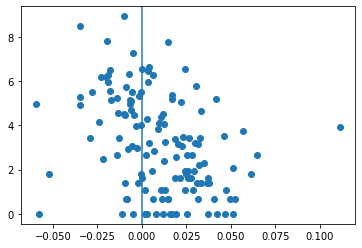

In [21]:
fig, ax = plt.subplots()
ax.scatter(df["min"], np.log(df["INCLUDE"]))
ax.axvline(0)

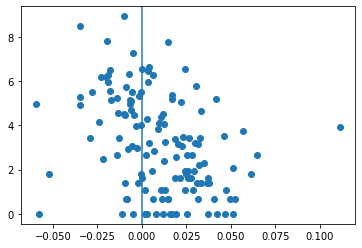

In [22]:
fig, ax = plt.subplots()
ax.scatter(df["max"], np.log(df["INCLUDE"]))
ax.axvline(0)

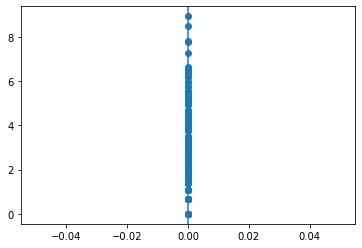

In [23]:
fig, ax = plt.subplots()
ax.scatter(df["spread"], np.log(df["INCLUDE"]))
ax.axvline(0)

In [24]:
from matplotlib.colors import LogNorm, Normalize
from matplotlib.cm import get_cmap, ScalarMappable
from matplotlib import colormaps
def map_countries(df, ax, y, c_scheme="viridis_r", log=False):

    ax.coastlines(lw=0.1)
    
    ax.add_feature(feature.BORDERS, lw=0.1, color='grey')

    cmap = colormaps['viridis_r']
    if log:
        norm = LogNorm(vmin=df[df[y]>0][y].min(), vmax=df[y].max())
    else:
        norm = Normalize(vmin=0, vmax=df[y].max())
    
    print(df[y].max())
    
    colors = [cmap(norm(x)) for x in df[y]]
    
    for i, row in df.iterrows():

        ax.add_geometries(
            [row.ee_geo],
            color=[cmap(norm(row[y]))],
            crs=ccrs.EqualEarth(),lw=0.1, linestyle=':',ec="black"
        )

    cbar = fig.colorbar(
        ScalarMappable(norm=norm, cmap=cmap), 
        ax=ax, orientation="horizontal",
        fraction=0.046, pad=0.04
    )

7494.0


/home/max/.local/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


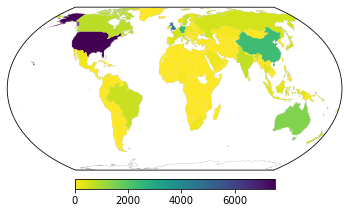

In [25]:
fig = plt.figure()

ax = fig.add_subplot(projection=p)
map_countries(df, ax, "INCLUDE")

In [26]:
df["studies_policy"] = df["studies_policy"].replace(np.inf, np.NaN)

7494.0
474.0
11715.665898880485
29749.536309145416
29.0
7165705.3699443545


/home/max/.local/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/max/.local/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


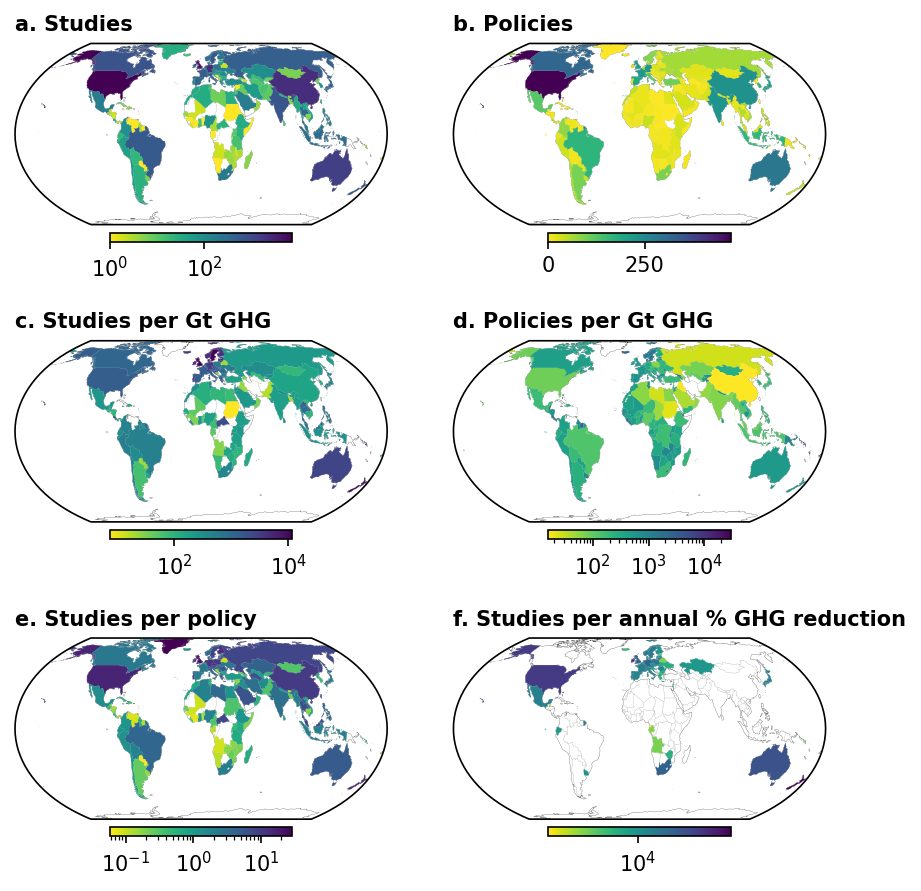

In [27]:
fig = plt.figure(figsize=(7.2,7), dpi=150, constrained_layout=False)

p = ccrs.EqualEarth()
pc = ccrs.PlateCarree()

gs = fig.add_gridspec(3, 2, figure=fig, wspace=0.1, hspace=0.5)

ts = 10
loc = 'left'
fw = 'bold'

axa = plt.subplot(gs[0,0], projection=p)
axa.set_title("a. Studies", fontsize=ts, loc=loc, fontweight=fw)

map_countries(df, axa, "INCLUDE", log=True)

axb = plt.subplot(gs[0,1], projection=p)
axb.set_title("b. Policies", fontsize=ts, loc=loc, fontweight=fw)

map_countries(df, axb, "n_policies")

axc = plt.subplot(gs[1,0], projection=p)
axc.set_title("c. Studies per Gt GHG", fontsize=ts, loc=loc, fontweight=fw)
map_countries(df, axc, "studies_GHG", log=True)

axd = plt.subplot(gs[1,1], projection=p)
axd.set_title("d. Policies per Gt GHG", fontsize=ts, loc=loc, fontweight=fw)
map_countries(df, axd, "policies_GHG", log=True)

axe = plt.subplot(gs[2,0], projection=p)
axe.set_title("e. Studies per policy", fontsize=ts, loc=loc, fontweight=fw)
map_countries(df, axe, "studies_policy", log=True)

axf = plt.subplot(gs[2,1], projection=p)
axf.set_title("f. Studies per annual % GHG reduction", fontsize=ts, loc=loc, fontweight=fw)
map_countries(df, axf, "studies_reduction", log=True)


plt.savefig(f"../figures/density_maps{dbpath}.png", bbox_inches="tight", dpi=150)
plt.savefig(f"../figures/density_maps{dbpath}.pdf", bbox_inches="tight")

7494.0
474.0
11715.665898880485
29749.536309145416
29.0
7165705.3699443545


/home/max/.local/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/max/.local/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


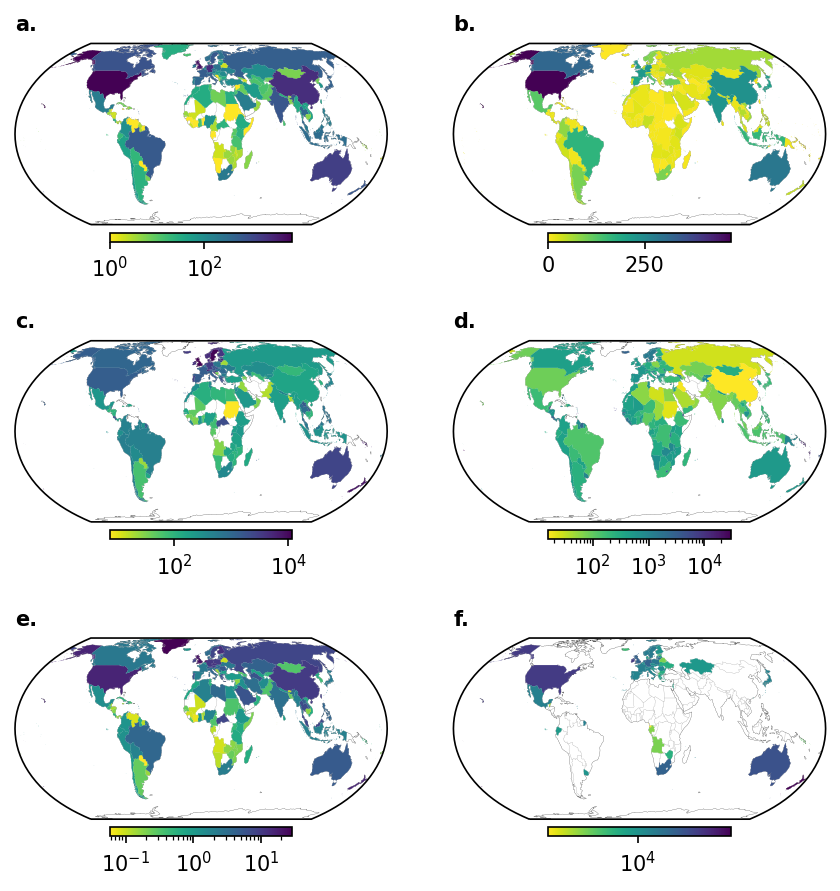

In [28]:
fig = plt.figure(figsize=(7.2,7), dpi=150, constrained_layout=False)

p = ccrs.EqualEarth()
pc = ccrs.PlateCarree()

gs = fig.add_gridspec(3, 2, figure=fig, wspace=0.1, hspace=0.5)

ts = 10
loc = 'left'
fw = 'bold'

axa = plt.subplot(gs[0,0], projection=p)
axa.set_title("a.", fontsize=ts, loc=loc, fontweight=fw)

map_countries(df, axa, "INCLUDE", log=True)

axb = plt.subplot(gs[0,1], projection=p)
axb.set_title("b.", fontsize=ts, loc=loc, fontweight=fw)

map_countries(df, axb, "n_policies")

axc = plt.subplot(gs[1,0], projection=p)
axc.set_title("c.", fontsize=ts, loc=loc, fontweight=fw)
map_countries(df, axc, "studies_GHG", log=True)

axd = plt.subplot(gs[1,1], projection=p)
axd.set_title("d.", fontsize=ts, loc=loc, fontweight=fw)
map_countries(df, axd, "policies_GHG", log=True)

axe = plt.subplot(gs[2,0], projection=p)
axe.set_title("e.", fontsize=ts, loc=loc, fontweight=fw)
map_countries(df, axe, "studies_policy", log=True)

axf = plt.subplot(gs[2,1], projection=p)
axf.set_title("f.", fontsize=ts, loc=loc, fontweight=fw)
map_countries(df, axf, "studies_reduction", log=True)


plt.savefig(f"../figures/density_maps{dbpath}.png", bbox_inches="tight", dpi=150)
plt.savefig(f"../figures/density_maps{dbpath}.pdf", bbox_inches="tight")

7165705.3699443545
363117.3667919603


/home/max/.local/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/max/.local/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


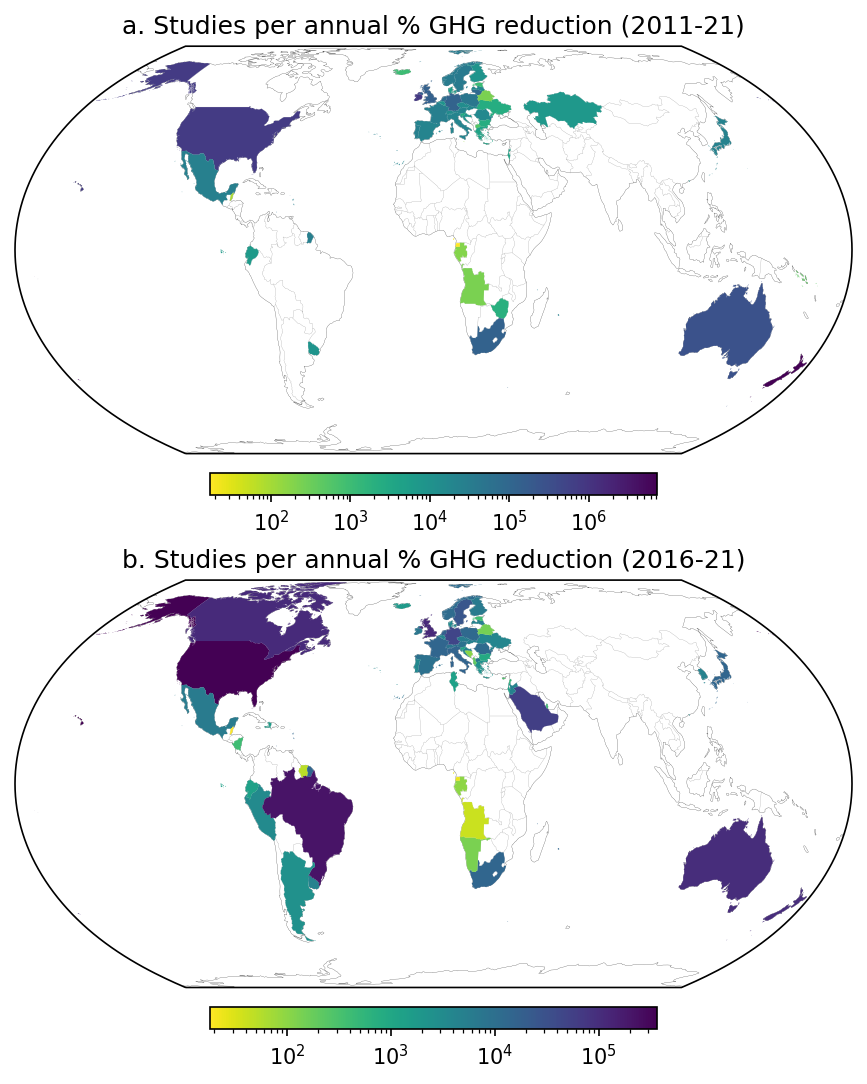

In [29]:
fig = plt.figure(figsize=(7.2,9), dpi=150, constrained_layout=False)

p = ccrs.EqualEarth()
pc = ccrs.PlateCarree()

gs = fig.add_gridspec(2, 1, figure=fig, wspace=0.1, hspace=0.1)

axf = plt.subplot(gs[0,0], projection=p)
axf.set_title("a. Studies per annual % GHG reduction (2011-21)")
map_countries(df, axf, "studies_reduction", log=True)

axf = plt.subplot(gs[1,0], projection=p)
axf.set_title("b. Studies per annual % GHG reduction (2016-21)")
map_countries(df, axf, "studies_reduction_5", log=True)

plt.savefig(f"../figures/density_maps_reduction.png", bbox_inches="tight", dpi=150)
plt.savefig(f"../figures/density_maps_reduction.pdf", bbox_inches="tight")

47412.08673979777
29.0
24791.280257621183
288.2307692307692
29297.71669564577
38.714285714285715


/home/max/.local/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/max/.local/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


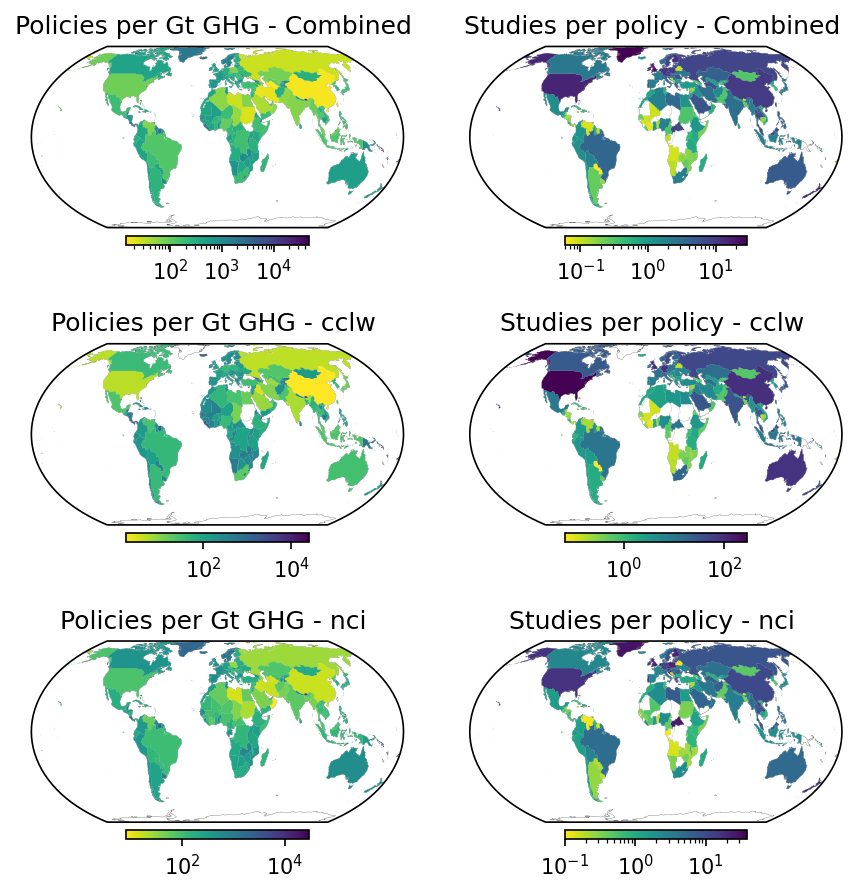

In [30]:
fig = plt.figure(figsize=(7.2,7), dpi=150, constrained_layout=False)

p = ccrs.EqualEarth()
pc = ccrs.PlateCarree()

gs = fig.add_gridspec(3, 2, figure=fig, wspace=0.1, hspace=0.5)

db_dfs = []


for i, dbpath in enumerate(dbs):
    cdf_pol_db = pd.read_csv(f'../data/pdb_countries{dbpath}.csv')
    db_df = total_emissions.merge(cdf, how='outer').merge(cdf_pol_db, how="outer")
    db_df = adm0shps.merge(db_df, left_on="ADM0_A3", right_on="country_code3")#.sample(50)
    p = ccrs.EqualEarth()
    
    db_df["policies_GHG"] = db_df["n_policies"] / (db_df["GHG"]/1e9) 
    db_df["studies_policy"] = db_df["INCLUDE"] / (db_df["n_policies"]) 
    
    db_dfs.append(db_df)
    
    if dbpath == '': dbpath = 'Combined'
    
    ax = plt.subplot(gs[i,0], projection=p)
    ax.set_title(f"Policies per Gt GHG - {dbpath.replace('_','')} ")
    map_countries(db_df, ax, "policies_GHG", log=True)
    
    ax = plt.subplot(gs[i,1], projection=p)
    ax.set_title(f"Studies per policy - {dbpath.replace('_','')} ")
    map_countries(db_df, ax, "studies_policy", log=True)
    
plt.savefig(f"../figures/density_maps_db.png", bbox_inches="tight", dpi=150)
plt.savefig(f"../figures/density_maps_db.pdf", bbox_inches="tight")

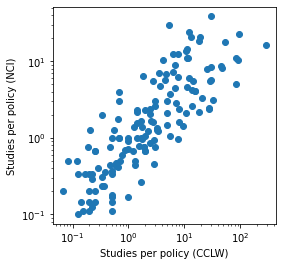

In [31]:
fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(db_dfs[1].studies_policy, db_dfs[2].studies_policy)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Studies per policy (CCLW)')
ax.set_ylabel('Studies per policy (NCI)')

plt.savefig(f"../figures/db_comparison.png", bbox_inches="tight", dpi=150)
plt.savefig(f"../figures/db_comparison.pdf", bbox_inches="tight")

In [32]:
df['industry_prop'] = df['8 - 03. Industry'] / df['INCLUDE']

0.21052631578947367


/home/max/.local/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/max/.local/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


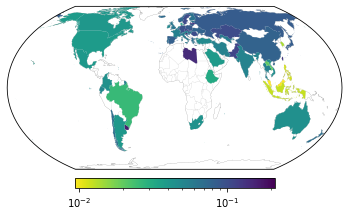

In [33]:
fig = plt.figure()
ax = plt.subplot(projection=p)
map_countries(df, ax, "industry_prop", log=True)
plt.savefig(f"../figures/industry_prop{dbpath}.pdf", bbox_inches="tight")

In [34]:
list(df.columns)

['featurecla',
 'scalerank',
 'LABELRANK',
 'SOVEREIGNT',
 'SOV_A3',
 'ADM0_DIF',
 'LEVEL',
 'TYPE',
 'ADMIN',
 'ADM0_A3',
 'GEOU_DIF',
 'GEOUNIT',
 'GU_A3',
 'SU_DIF',
 'SUBUNIT',
 'SU_A3',
 'BRK_DIFF',
 'NAME',
 'NAME_LONG',
 'BRK_A3',
 'BRK_NAME',
 'BRK_GROUP',
 'ABBREV',
 'POSTAL',
 'FORMAL_EN',
 'FORMAL_FR',
 'NAME_CIAWF',
 'NOTE_ADM0',
 'NOTE_BRK',
 'NAME_SORT',
 'NAME_ALT',
 'MAPCOLOR7',
 'MAPCOLOR8',
 'MAPCOLOR9',
 'MAPCOLOR13',
 'POP_EST',
 'POP_RANK',
 'GDP_MD_EST',
 'POP_YEAR',
 'LASTCENSUS',
 'GDP_YEAR',
 'ECONOMY',
 'INCOME_GRP',
 'WIKIPEDIA',
 'FIPS_10_',
 'ISO_A2',
 'ISO_A3',
 'ISO_A3_EH',
 'ISO_N3',
 'UN_A3',
 'WB_A2',
 'WB_A3',
 'WOE_ID',
 'WOE_ID_EH',
 'WOE_NOTE',
 'ADM0_A3_IS',
 'ADM0_A3_US',
 'ADM0_A3_UN',
 'ADM0_A3_WB',
 'CONTINENT',
 'REGION_UN',
 'SUBREGION',
 'REGION_WB',
 'NAME_LEN',
 'LONG_LEN',
 'ABBREV_LEN',
 'TINY',
 'HOMEPART',
 'MIN_ZOOM',
 'MIN_LABEL',
 'MAX_LABEL',
 'NE_ID',
 'WIKIDATAID',
 'NAME_AR',
 'NAME_BN',
 'NAME_DE',
 'NAME_EN',
 'NAME_ES',
 'NA

In [35]:
df[(pd.notna(df['studies_GHG']))].sort_values('studies_GHG').reset_index()

,index,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,...,Waste,Cross-sectoral,studies_GHG,policies_GHG,studies_policy,studies_reduction,studies_reduction_5,studies_increase,studies_spread,industry_prop
0,146,Admin-0 country,1,5,Djibouti,DJI,0,2,Sovereign country,Djibouti,...,0.0,3.0,0.000000,3631.181647,0.000000,-0.000000e+00,0.000000,0.000000e+00,NaN,NaN
1,51,Admin-0 country,1,6,Saint Vincent and the Grenadines,VCT,0,2,Sovereign country,Saint Vincent and the Grenadines,...,0.0,1.0,0.000000,14192.839641,0.000000,0.000000e+00,0.000000,-0.000000e+00,NaN,NaN
2,165,Admin-0 country,1,4,Cabo Verde,CPV,0,2,Sovereign country,Cabo Verde,...,0.0,3.0,0.000000,8132.358063,0.000000,-0.000000e+00,-0.000000,0.000000e+00,NaN,NaN
3,71,Admin-0 country,1,3,Niger,NER,0,2,Sovereign country,Niger,...,0.0,2.0,0.000000,180.273641,0.000000,-0.000000e+00,-0.000000,0.000000e+00,NaN,NaN
4,63,Admin-0 country,1,2,Papua New Guinea,PNG,0,2,Sovereign country,Papua New Guinea,...,0.0,4.0,0.000000,924.568689,0.000000,-0.000000e+00,-0.000000,0.000000e+00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,95,Admin-0 country,1,6,Luxembourg,LUX,0,2,Sovereign country,Luxembourg,...,1.0,8.0,6949.723326,2316.574442,3.000000,2.616752e+03,3893.213506,-2.616752e+03,inf,0.015873
163,39,Admin-0 country,4,3,Solomon Islands,SLB,0,2,Sovereign country,Solomon Islands,...,0.0,4.0,7095.057171,14190.114342,0.500000,4.327514e+02,-219.831489,-4.327514e+02,inf,0.000000
164,73,Admin-0 country,1,2,New Zealand,NZ1,1,2,Country,New Zealand,...,1.0,15.0,8243.914941,530.310318,15.545455,7.165705e+06,101407.785556,-7.165705e+06,inf,0.068713
165,30,Admin-0 country,3,3,Sweden,SWE,0,2,Sovereign country,Sweden,...,3.0,15.0,11035.999595,1387.662671,7.952941,3.733451e+04,25527.654890,-3.733451e+04,inf,0.103550
